# extract data, then read all the data, then see which one does the best. Try to plot them out as well i guess

In [1]:
import zipfile
import os

# Specify the folder containing the zip files
folder_path = 'data/outputData'

# Get a list of all zip files in the folder
zip_files = [f for f in os.listdir(folder_path) if f.endswith('.zip')]

# Loop through each zip file and extract its contents to a subfolder
for zip_file in zip_files:
    # Create a subfolder with the same name as the zip file (without the .zip extension)
    subfolder_name = os.path.splitext(zip_file)[0]
    subfolder_path = os.path.join(folder_path, subfolder_name)
    os.makedirs(subfolder_path, exist_ok=True)

    # Extract the contents of the zip file to the subfolder
    with zipfile.ZipFile(os.path.join(folder_path, zip_file), 'r') as zip_ref:
        zip_ref.extractall(subfolder_path)

print("All zip files have been extracted to subfolders.")


All zip files have been extracted to subfolders.


In [2]:
import os
import json

# Specify the root folder to search for .json files
root_folder = 'data/outputData'

# Initialize a dictionary to store the loaded JSON data
json_data = {}

# Recursively search for .json files in the root folder and its subfolders
for folder_path, _, files in os.walk(root_folder):
    for file_name in files:
        if file_name.endswith('.json'):
            # Construct the full path to the JSON file
            json_file_path = os.path.join(folder_path, file_name)

            # Load the JSON data and store it in the dictionary with the filename as the key
            with open(json_file_path, 'r') as json_file:
                data = json.load(json_file)
                # Use the filename (without the .json extension) as the key
                json_data[file_name[:-5]] = data


fixed_data_aug_InceptionModel4_base


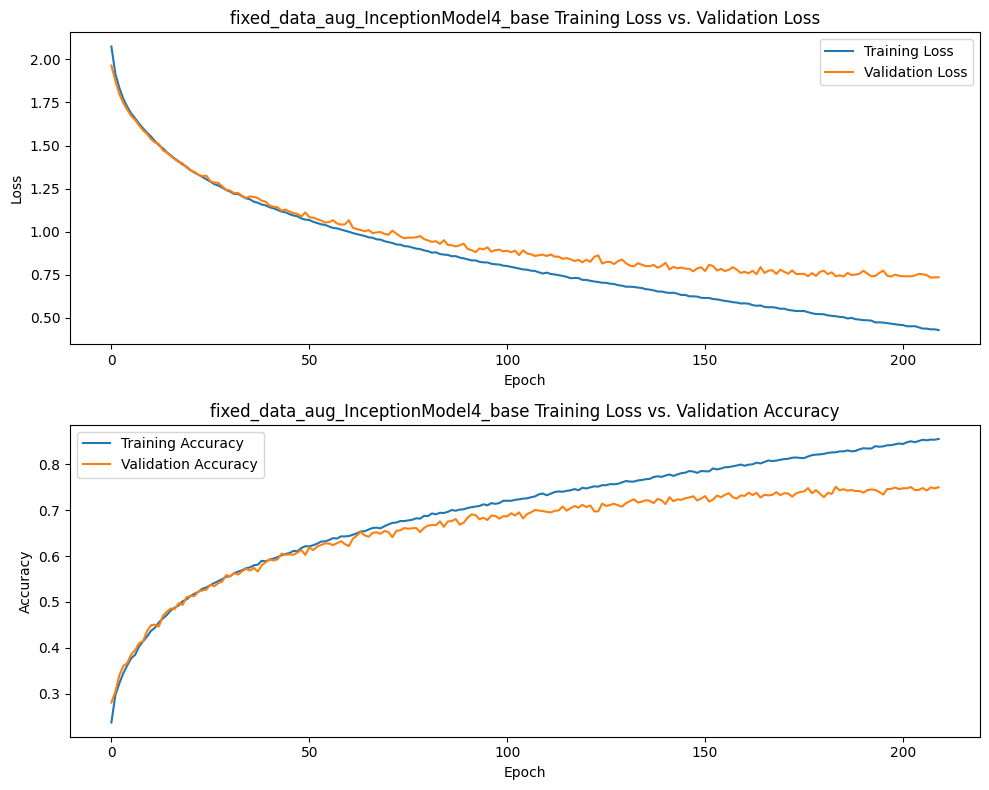

fixed_data_aug_InceptionModel4_crop


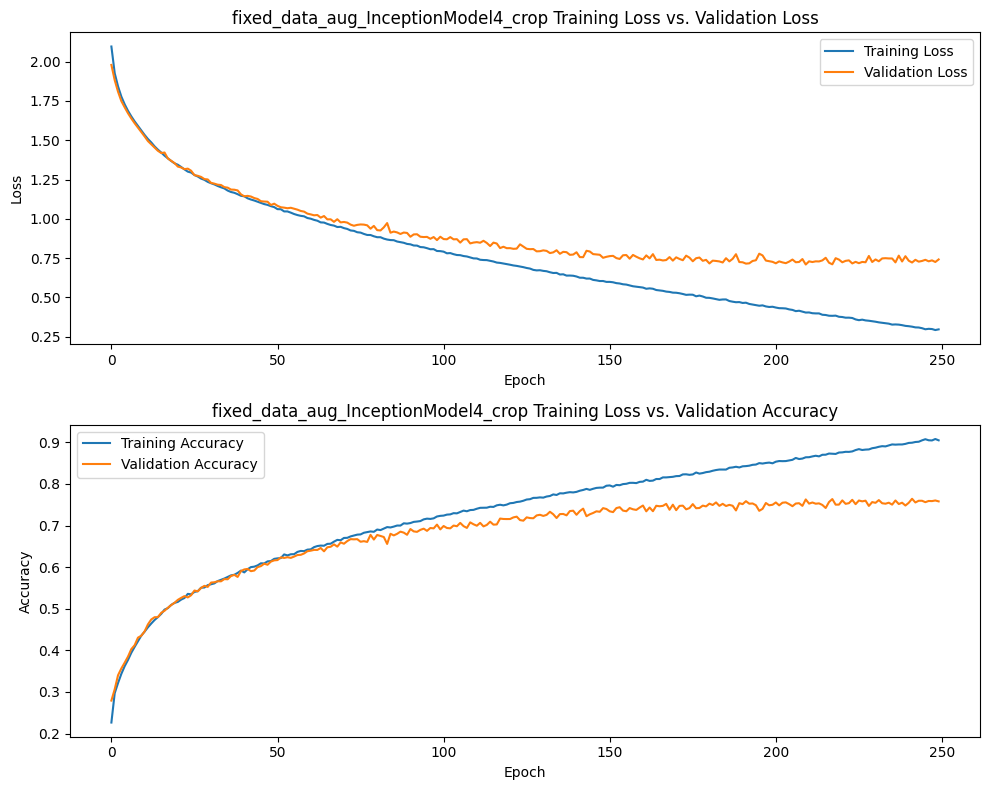

fixed_data_aug_InceptionModel4_crop_flip


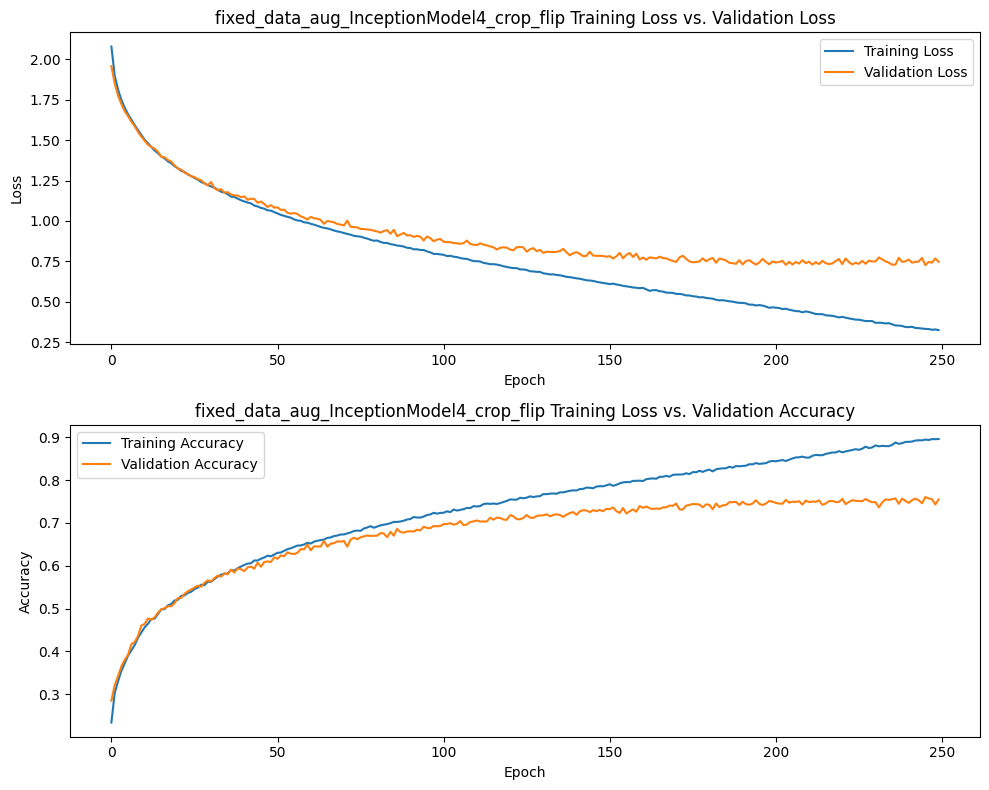

fixed_data_aug_InceptionModel4_crop_train_forever


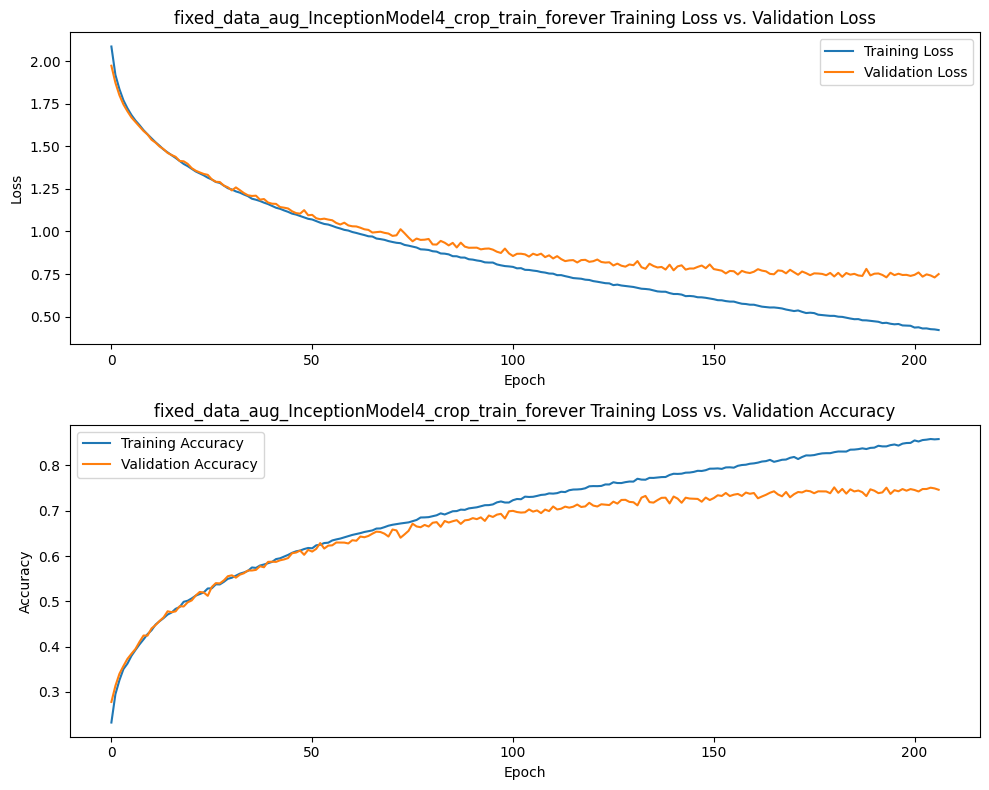

fixed_data_aug_InceptionModel4_crop_train_forever_2


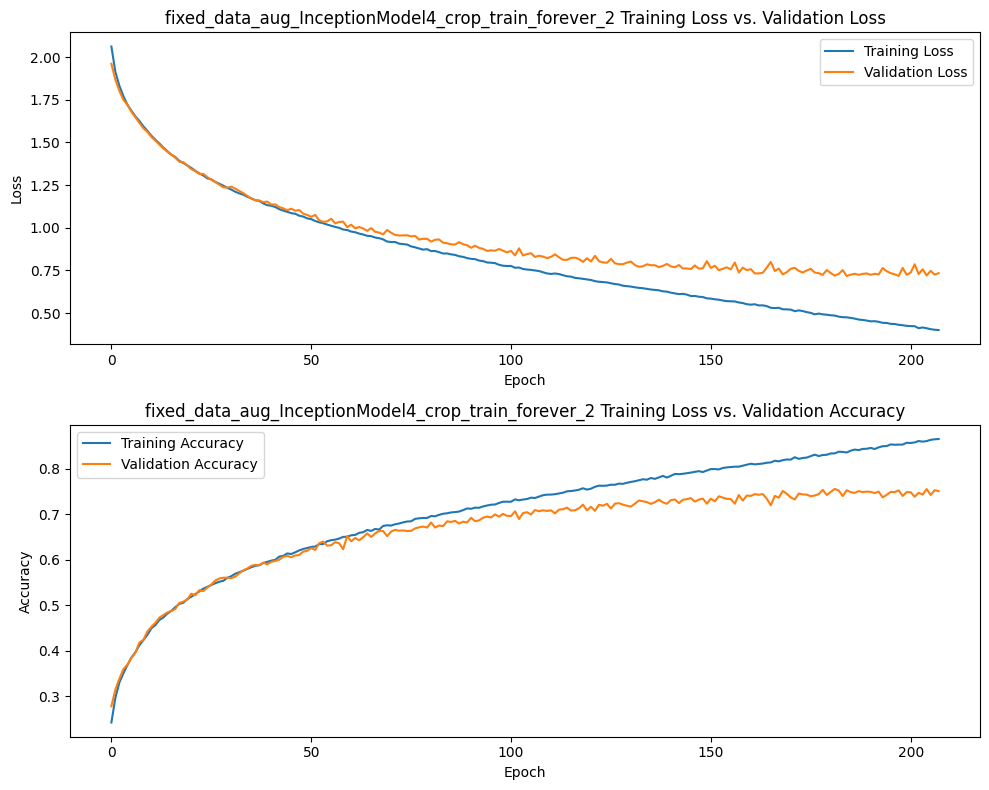

fixed_data_aug_InceptionModel4_flip


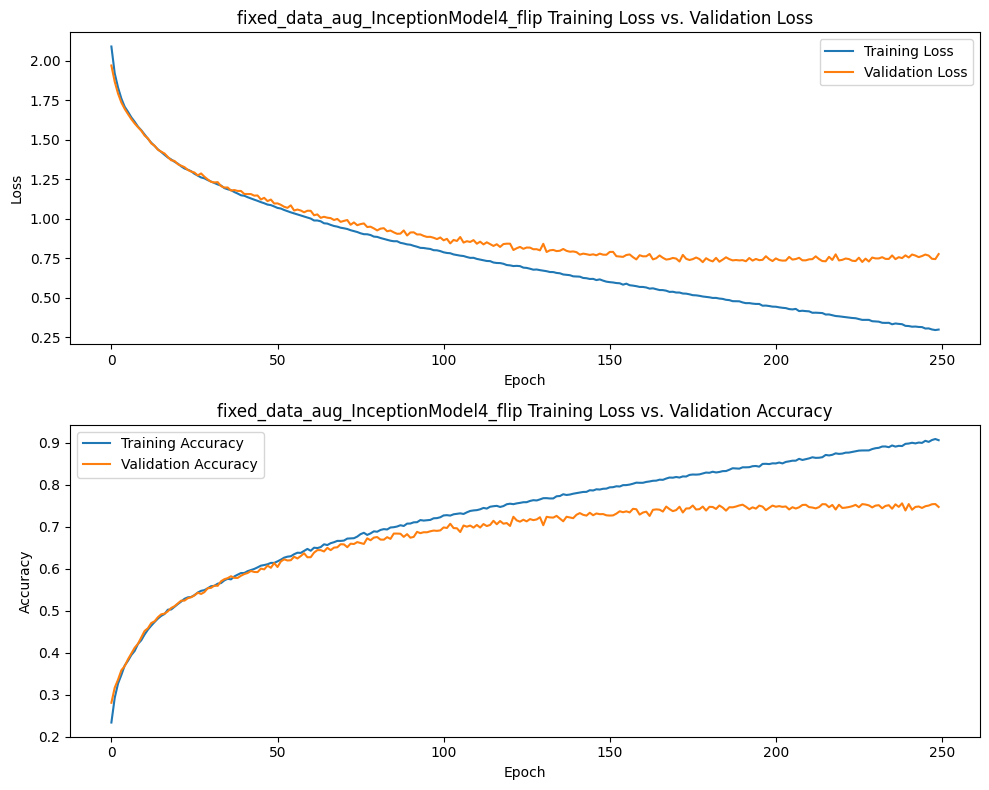

fixed_data_aug_InceptionModel4_rotate


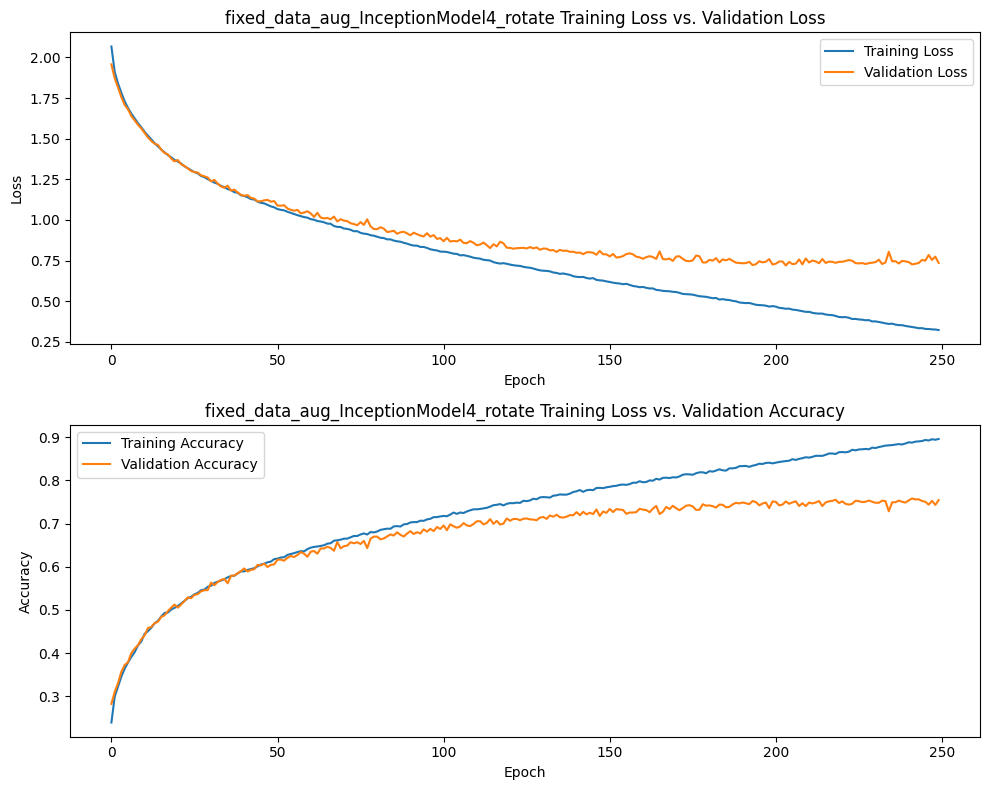

InceptionModel3_base


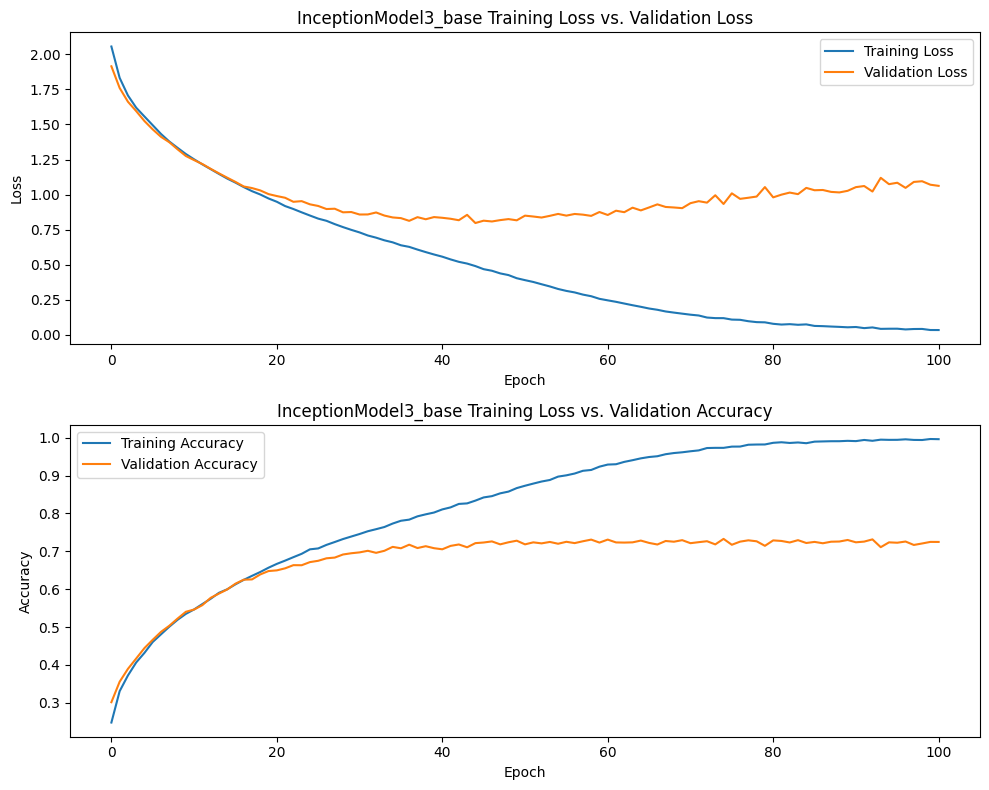

In [3]:
# plotting a graph for each data. Plotting for loss and accuracy value for all of them
# plotting section
import matplotlib.pyplot as plt

for item in json_data:
    # this one should loop through each of the model name
    name = str(item)
    data = json_data[name]
    print(str(item))

    # Create a figure with two subplots
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column of subplots

    # Plot for Training and Validation Loss
    axes[0].plot(data['epoch_loss_values_train'], label='Training Loss')
    axes[0].plot(data['epoch_loss_values_eval'], label='Validation Loss')
    title = f'{name} Training Loss vs. Validation Loss'
    axes[0].set_title(title)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plot for Training and Validation Accuracy
    axes[1].plot(data['epoch_accuracy_values_train'], label='Training Accuracy')
    axes[1].plot(data['epoch_accuracy_values_eval'], label='Validation Accuracy')
    title = f'{name} Training Loss vs. Validation Accuracy'
    axes[1].set_title(title)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    # Adjust layout to prevent overlapping of titles and labels
    plt.tight_layout()

    # Show the plots
    plt.show()



In [4]:
# plotting a graph for each data. Plotting for loss and accuracy value for all of them
# plotting section
import re

# this one grabs the best test version, as well as the time taken for the training
import matplotlib.pyplot as plt

for item in json_data:
    # this one should loop through each of the model name
    name = str(item)
    data = json_data[name]
    print(str(item))

    # i want the best performing epoch as well
    # this one would look through the eval accuracy
    best_epoch = 0
    best_eval_acc = 0
    for idx, value in enumerate(data['epoch_accuracy_values_eval']):
        if value > best_eval_acc:
            best_eval_acc = value
            best_epoch = idx

    # printing best epoch along with best eval and train values
    print(f' best epoch is {best_epoch}\n best eval is {best_eval_acc}\n best train is {data["epoch_accuracy_values_train"][best_epoch]}')

    # this will be the test accuracy
    temp_string = str(data['test_accuracy'])
    pattern = r'[0-9].[0-9]{4}'
    temp_string = re.search(pattern, temp_string)
    print(f' test accuracy is: {temp_string.group(0)}')

    # this will be the time needed to train it
    if data['elapsed_time']:
        print(str(data['elapsed_time']))




fixed_data_aug_InceptionModel4_base
 best epoch is 183
 best eval is 0.7512937784194946
 best train is 0.826574981212616
 test accuracy is: 0.7440
5874.232971429825
fixed_data_aug_InceptionModel4_crop
 best epoch is 241
 best eval is 0.7644307613372803
 best train is 0.8991999626159668
 test accuracy is: 0.7608
6966.467496395111
fixed_data_aug_InceptionModel4_crop_flip
 best epoch is 245
 best eval is 0.7603503465652466
 best train is 0.8946249485015869
 test accuracy is: 0.7559
6971.355830907822
fixed_data_aug_InceptionModel4_crop_train_forever
 best epoch is 180
 best eval is 0.7516918778419495
 best train is 0.8294000029563904
 test accuracy is: 0.7409
5709.889554262161
fixed_data_aug_InceptionModel4_crop_train_forever_2
 best epoch is 181
 best eval is 0.755971372127533
 best train is 0.8341749906539917
 test accuracy is: 0.7440
5770.810935974121
fixed_data_aug_InceptionModel4_flip
 best epoch is 238
 best eval is 0.7552747130393982
 best train is 0.8917999863624573
 test accuracy 

In [5]:
# print out their name as well as their validation and training stuff so that I can plot them out in excel i guess
# i can probably automate it using code i guess

import pandas as pd
import os
from itertools import zip_longest

# specifying save location
folder_path = 'data/outputData'
output_csv = os.path.join(folder_path, 'dataAnalysis.csv')


# this is the thing i will be saving
to_be_saved = {}

# getting all the data into a single dictionary i guess
for item in json_data:
    # this one should loop through each of the model name
    name = str(item)
    data = json_data[name]
    # print(str(item))

    # temp empty list
    zeros_list = [0]*300

    # validation loss
    tempName = f'{name} validation loss'
    tempData = [sum(values) for values in zip_longest(data['epoch_loss_values_eval'], zeros_list, fillvalue=0)]
    to_be_saved[tempName] = tempData

    # validation accuracy
    tempName = f'{name} validation accuracy'
    tempData = [sum(values) for values in zip_longest(data['epoch_accuracy_values_eval'], zeros_list, fillvalue=0)]
    to_be_saved[tempName] = tempData

    # training loss
    tempName = f'{name} training loss'
    tempData = [sum(values) for values in zip_longest(data['epoch_loss_values_train'], zeros_list, fillvalue=0)]
    to_be_saved[tempName] = tempData

    # training accuracy
    tempName = f'{name} training accuracy'
    tempData = [sum(values) for values in zip_longest(data['epoch_accuracy_values_train'], zeros_list, fillvalue=0)]
    to_be_saved[tempName] = tempData

df = pd.DataFrame(to_be_saved)

# saving it to a csv file
df.to_csv(output_csv, index=False)